| <div> <img src="https://storage.googleapis.com/open-ff-common/openFF_logo.png" width="100"/><br>Open-FF</div>|<h1>Local fracking demo</h1>|<center><a href="https://www.fractracker.org/" title="FracTracker Alliance"><img src="https://storage.googleapis.com/open-ff-common/2021_FT_logo_icon.png" alt="FracTracker logo" width="100" height="100"><br>Sponsored by<br> FracTracker Alliance</a></center>|
|---|---|---|

In [ ]:
# fetch the Open-FF code repository and master data file from remote storage
# For use in COLAB, the following lines should be uncommented; 
#   comment all lines if running locally

# !git clone https://github.com/gwallison/openFF.git &>/dev/null;
# !pip install itables  &>/dev/null;
# !pip install geopandas  &>/dev/null;
# %run openFF/notebooks/Explore_near_location_support.py

In [1]:
# Local - The lines below should stay commented unless running locally, they would replace the cell above
import sys
sys.path.insert(0,'c:/MyDocs/integrated/') # adjust to your setup
%run Data_set_customizer_support.py

sandbox already exists
File already downloaded
Creating full dataframe...
Completed


In [3]:
# MANUAL ENTRY of lat/lon
# lat = 32.6967627558117; lon = -97.18214065821618  # test location
# lat = 31.62049482630234; lon = -102.21593260383503
# lat = 39.8313970034219; lon = -80.91392628688207
# lat = 40.02768906906318; lon = -80.04506026390985 # Bryan Latkanich's home
#lat = 40.111543652018085; lon = -80.10836006475418 # Lois's house
# lat = 39.79706290876846; lon = -80.33322585669664 # EQT well in Greene PA
lat = 40.38948396033769; lon = -79.58238185278023 # Apex pad in PA
#lat = 40.30120000; lon = -80.64450000 # Ascent pad in OH

In [4]:
print(lat,lon)

40.38948396033769 -79.58238185278023


## Map focal site

In [23]:
gt.show_simple_map(lat,lon,clickable=True)

In [25]:
radius_in_feet = 5280
radius_m = radius_in_feet * 0.3048
apis = locate_wells(df,lat,lon,buffer_m=radius_m)
gt.showWells(df,lat,lon,apis)

Number of wells = 13


---
# Well information

In [26]:
t, dgb = show_well_info(apis)

# How big are the fracking jobs?

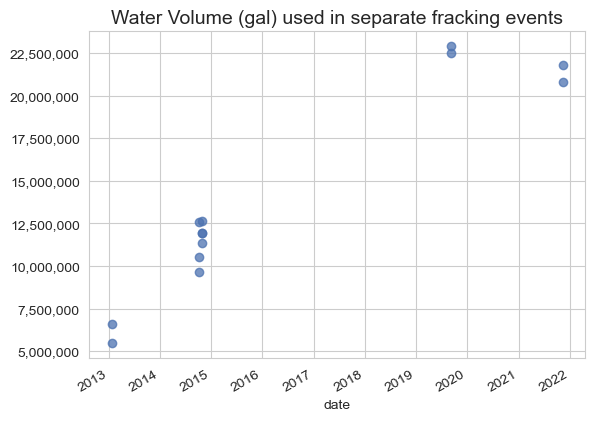

In [27]:
show_water_used(dgb)

# What chemicals are used?
### All fracking jobs combined

In [28]:
show_chem_summary(t)

|Explanation of columns in the index|
| :---: |

| Column      | Description |
| :----: | :-------- |
|*Material*| at top is the CAS registration number of the chemical. **Click on this link** to display summary of this chemical for all of FracFocus (filtered data - up to last major update). Below are two names for the material: the upper is used by SciFinder as the primary name and the lower is the most common reported name in FracFocus| 
|*ref*|Click on the "csv" link to a csv-formatted file that has all the filtered records for this chemical.  Click on "PubChem" link for a PubChem web search for this chemical.  Click on "EPA: CompTox" for the summary page in that resource|
|*total num records* |indicates the number of records across the FracFocus data. A given chemical may appear more than once in a disclosure. |
|*num records with mass*|indicates the number of records with mass of this chemical in the **filtered** data. Without mass, a record only indicates **presence** in the disclosure.|
|*Total mass used (lbs)*| the sum of the computable mass of all records in the set|
|*Chemicals of Concern* |indicates if the chemical is on one of the following lists.  Type the name of the list into the Search box to limit to those chemicals.<br> - **CWA**: indicates that the chemical is on the [Clean Water Act list](https://comptox.epa.gov/dashboard/chemical_lists/CWA311HS) as compiled in EPA's CompTox<br>- **DWSHA**: indicated that the chemical is on the EPA's [Drinking Water Safety and Health Advisory](https://comptox.epa.gov/dashboard/chemical_lists/EPADWS) list<br>- **TEDX**: indicates that the chemical is on [The Endocrine Disruption Exchange](https://endocrinedisruption.org) list<br>- **prop_65**: indicates that the chemical is on [California's Proposition 65](https://oehha.ca.gov/proposition-65/proposition-65-list) list<br>- **EPA_PFAS**: indicates that the chemical is on EPA's comprehensive list of PFAS related compounds<br>- **EPA_volatile**: indicates that the chemical is on the EPA's volatile chemical list<br>- **UVCB**: indicates that the chemical is on the [TSCA list of "Unknown, Variable composition, Complex reaction products and Biological"](https://www.epa.gov/sites/default/files/2015-05/documents/uvcb.pdf) materials, meaning "these chemical substances cannot be represented by unique structures and molecular formulas."<br>- **diesel**: indicates that the chemical is [on the EPA list that](https://www.epa.gov/uic/diesel-fuels-hydraulic-fracturing-dfhf) "represent the most appropriate interpretation of the statutory term 'diesel fuels' to use for permitting diesel fuels hydraulic fracturing under the UIC Program nationwide.|
